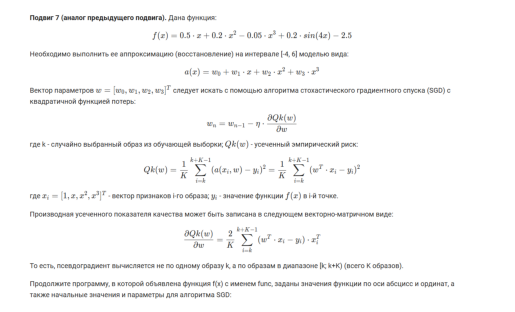

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/2_2_2.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [ ]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# здесь объявляйте необходимые функции


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50 # размер мини-батча (величина K = 50)

X = np.power(coord_x.reshape(-1, 1), range(4))
Qe = np.mean((X @ w.T - coord_y) ** 2)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
for _ in range(N):
    k = np.random.randint(0, sz-batch_size-1)
    y_pred = X[k:k+batch_size-1] @ w.T
    w -= eta * 2 / batch_size * ((y_pred - coord_y[k:k+batch_size-1]) @ X[k:k+batch_size-1])
    Qe = lm * ((y_pred - coord_y[k:k+batch_size-1]) ** 2) + (1 - lm) * Qe

Qe = Qe[-1]
Q = np.square(X @ w.T - coord_y).mean()

0.02089319712007003
